In [45]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree

In [2]:
# @title
df = pd.read_csv('/content/Illinois_10_years_data.csv')

In [3]:
# @title
df.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Operating_Carrier_Code,Tail_Number,Origin_Airport_ID,Origin_Airport_Code,Origin_State_Name,...,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Cover_Level_1,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,2,4,1.0,2.0,AA,N359AA,13930.0,ORD,Illinois,...,260.0,15.0,0.0,30.0,1014.2,10.0,SCT,22000.0,40.28,0.0
1,2014,2,4,1.0,2.0,AA,N3ADAA,13930.0,ORD,Illinois,...,260.0,24.0,0.0,30.0,1008.9,10.0,SCT,2800.0,20.44,0.0
2,2014,2,4,1.0,2.0,AA,N3AKAA,13930.0,ORD,Illinois,...,220.0,15.0,0.0,30.0,1004.2,10.0,SCT,4300.0,55.04,0.0
3,2014,2,4,1.0,2.0,AA,N3AKAA,13930.0,ORD,Illinois,...,250.0,20.0,0.0,30.0,1011.5,10.0,OVC,2600.0,21.74,0.0
4,2014,2,4,1.0,2.0,AA,N3ANAA,13930.0,ORD,Illinois,...,220.0,15.0,0.0,30.0,1004.2,10.0,CLR,4700.0,55.26,0.0


In [4]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969937 entries, 0 to 2969936
Data columns (total 31 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Year                              int64  
 1   Quarter                           int64  
 2   Month                             int64  
 3   Day_of_Month                      float64
 4   Day_of_Week                       float64
 5   Operating_Carrier_Code            object 
 6   Tail_Number                       object 
 7   Origin_Airport_ID                 float64
 8   Origin_Airport_Code               object 
 9   Origin_State_Name                 object 
 10  Destination_Airport_Code          object 
 11  Destination_State_Name            object 
 12  Scheduled_Departure_Time          float64
 13  Departure_Delay_Minutes           float64
 14  Taxi_Out_Time_Minutes             float64
 15  Flight_Distance_Miles             float64
 16  Departure_Datetime                ob

In [5]:
df.isna().sum()

,0
Year,0
Quarter,0
Month,0
Day_of_Month,0
Day_of_Week,0
Operating_Carrier_Code,0
Tail_Number,0
Origin_Airport_ID,0
Origin_Airport_Code,0
Origin_State_Name,0


In [6]:
df.dropna(inplace= True)

Convert predictors into new formats

In [7]:
# Convert integer features to int32
int_columns = [
    'Year',
    'Quarter',
    'Month',
    'Day_of_Month',
    'Day_of_Week',
    'Scheduled_Departure_Time',
    'Scheduled_Departure_Time_Minutes',
    'Target'
]

for col in int_columns:
    df[col] = df[col].astype(np.int32)

# Convert continuous numeric features to float32
float_columns = [
    'Departure_Delay_Minutes',
    'Taxi_Out_Time_Minutes',
    'Flight_Distance_Miles',
    'Air_Temperature_Fahrenheit',
    'Dew_Point_Temperature_Fahrenheit',
    'Relative_Humidity_Percent',
    'Wind_Direction_Degrees',
    'Wind_Speed_Knots',
    'Hourly_Precipitation_Inches',
    'Pressure_Altimeter_Inches',
    'Sea_Level_Pressure_Millibar',
    'Visibility_Miles',
    'Sky_Level_1_Altitude_Feet',
    'Apparent_Temperature_Fahrenheit',

]

for col in float_columns:
    df[col] = df[col].astype(np.float32)

# Convert categorical features to 'category' dtype
categorical_columns = [
    'Operating_Carrier_Code',
    'Tail_Number',
    'Origin_Airport_ID',
    'Origin_Airport_Code',
    'Origin_State_Name',
    'Destination_Airport_Code',
    'Destination_State_Name',
    'Sky_Cover_Level_1'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [8]:
df = df.drop([ 'Origin_State_Name','Departure_Datetime','Departure_Delay_Minutes'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969937 entries, 0 to 2969936
Data columns (total 28 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   Year                              int32   
 1   Quarter                           int32   
 2   Month                             int32   
 3   Day_of_Month                      int32   
 4   Day_of_Week                       int32   
 5   Operating_Carrier_Code            category
 6   Tail_Number                       category
 7   Origin_Airport_ID                 category
 8   Origin_Airport_Code               category
 9   Destination_Airport_Code          category
 10  Destination_State_Name            category
 11  Scheduled_Departure_Time          int32   
 12  Taxi_Out_Time_Minutes             float32 
 13  Flight_Distance_Miles             float32 
 14  Scheduled_Departure_Time_Minutes  int32   
 15  Air_Temperature_Fahrenheit        float32 
 16  Dew_Point_Temperat

In [10]:
df['Year'].value_counts()

,count
Year,
2019,426951
2020,420073
2015,395345
2014,362592
2017,301209
2023,300540
2016,292813
2021,254563
2018,166021


In [11]:
df1= df[df['Month'] == 1]

In [12]:
categorical_columns = [
    'Operating_Carrier_Code',
    'Tail_Number',
    'Origin_Airport_ID',
    'Origin_Airport_Code',
    'Destination_Airport_Code',
    'Destination_State_Name',
    'Sky_Cover_Level_1'
]
df1 = pd.get_dummies(df1, columns=categorical_columns)

Split data into training, testing, and validation sets by year

In [13]:
# Define the years for each dataset
train_years = [2014, 2015, 2016, 2017, 2018, 2019]
val_years = [2020, 2021, 2022]
test_years = [2023, 2024]

# Ensure the 'Year' column is of integer type
df1['Year'] = df1['Year'].astype(int)

# Create the training set
train_df = df1[df1['Year'].isin(train_years)].reset_index(drop=True)

# Create the validation set
val_df = df1[df1['Year'].isin(val_years)].reset_index(drop=True)

# Create the test set
test_df = df1[df1['Year'].isin(test_years)].reset_index(drop=True)

x_train = train_df.drop('Target', axis=1)
y_train = train_df['Target']
x_val = val_df.drop('Target', axis=1)
y_val = val_df['Target']


In [14]:
train_df['Year'].value_counts()

,count
Year,
2018,32116
2019,30290
2015,30099
2017,25477
2016,25412
2014,15129


Check the distribution of nondelayed (0) vs. delayed (1) flights

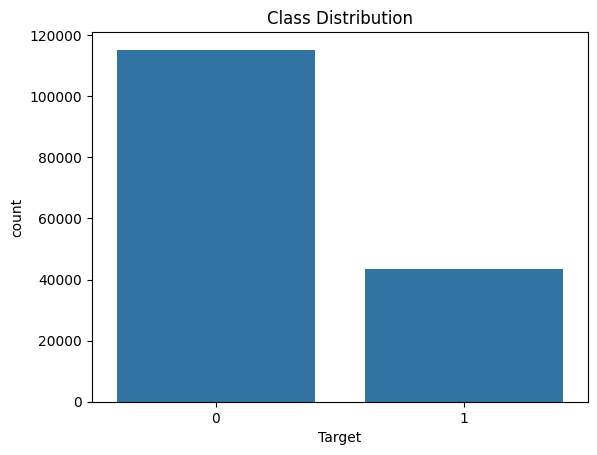

Proportion of Delayed Flights: 27.31%


In [15]:
sns.countplot(data=train_df, x='Target')
plt.title('Class Distribution')
plt.show()
proportion_delayed = train_df['Target'].mean()
print(f"Proportion of Delayed Flights: {proportion_delayed:.2%}")

Fit a logistic regression model using the unbalanced dataset

In [16]:
model_LR = LogisticRegression(max_iter=500)
model_LR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [17]:
y_pred = model_LR.predict(x_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Logistic Regression Accuracy: 0.8094109445799931
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     47010
           1       0.43      0.16      0.23     10370

    accuracy                           0.81     57380
   macro avg       0.63      0.56      0.56     57380
weighted avg       0.76      0.81      0.77     57380



Try fitting a logistic regression model on a balanced dataset by downsampling the number of delay instances

In [18]:
df_majority = train_df[train_df['Target'] == 0]
df_minority = train_df[train_df['Target'] == 1]

df_majority_downsampled = resample(df_majority,
                                 replace=False,
                                 n_samples=len(df_minority),
                                 random_state=303)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

df_balanced = df_balanced.sample(frac=1, random_state=303).reset_index(drop=True)

print(df_balanced['Target'].value_counts())

Target
1    43293
0    43293
Name: count, dtype: int64


Split training data into x_train and y_train

In [19]:
balanced_x_train = df_balanced.drop('Target', axis=1)
balanced_y_train = df_balanced['Target']

Fit balanced data to the logistic regression model and find prediction accuracy

In [24]:
balanced_model_LR = LogisticRegression(max_iter=500)
balanced_model_LR.fit(balanced_x_train, balanced_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [25]:
balanced_y_pred = balanced_model_LR.predict(x_val)
print("Unbalanced Logistic Regression Accuracy:", accuracy_score(y_val, balanced_y_pred))
print("Classification Report:\n", classification_report(y_val, balanced_y_pred))

Logistic Regression Accuracy: 0.6641512722202858
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77     47010
           1       0.28      0.56      0.37     10370

    accuracy                           0.66     57380
   macro avg       0.58      0.62      0.57     57380
weighted avg       0.77      0.66      0.70     57380



Examine the confusion matrices and different accuracy measures

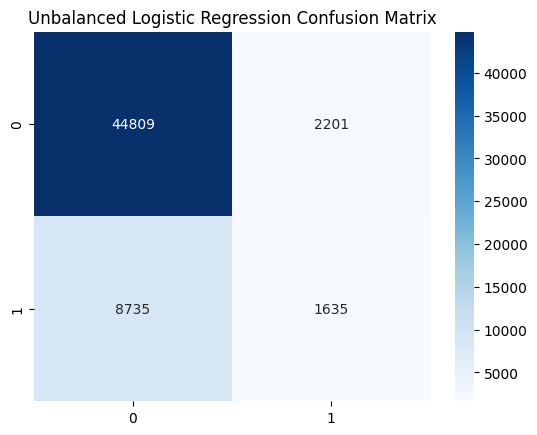

Accuracy: 80.94%
Precision: 42.62%
Recall (TPR): 15.77%
False Positive Rate (FPR): 4.68%
Specificity (TNR): 95.32%
F1 Score: 0.23


In [39]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Unbalanced Logistic Regression Confusion Matrix")
plt.show()

cm = confusion_matrix(y_val,y_pred)
tn, fp, fn, tp = cm.ravel()
# Calculate metrics

accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100
precision = (tp / (tp + fp))*100 if (tp + fp) != 0 else 0
recall = (tp / (tp + fn))*100 if (tp + fn) != 0 else 0
fpr = (fp / (fp + tn))*100 if (fp + tn) != 0 else 0
specificity = (tn / (tn + fp))*100 if (tn + fp) != 0 else 0
f1_score = (2 * (precision * recall) / (precision + recall))*.01 if (precision + recall) != 0 else 0

# Display results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall (TPR): {recall:.2f}%")
print(f"False Positive Rate (FPR): {fpr:.2f}%")
print(f"Specificity (TNR): {specificity:.2f}%")
print(f"F1 Score: {f1_score:.2f}")

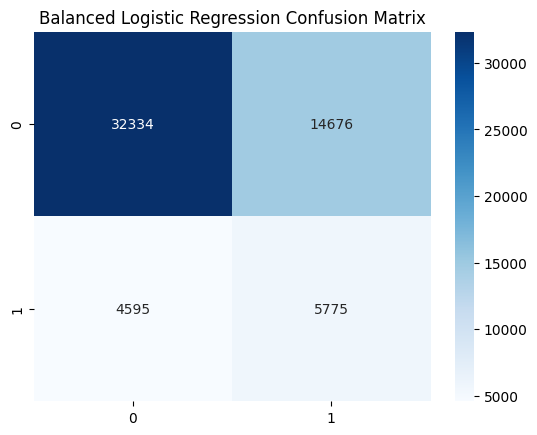

Accuracy: 66.42%
Precision: 28.24%
Recall (TPR): 55.69%
False Positive Rate (FPR): 31.22%
Specificity (TNR): 68.78%
F1 Score: 0.37


In [40]:
sns.heatmap(confusion_matrix(y_val, balanced_y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Balanced Logistic Regression Confusion Matrix")
plt.show()

cm = confusion_matrix(y_val,balanced_y_pred)
tn, fp, fn, tp = cm.ravel()
# Calculate metrics
accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100
precision = (tp / (tp + fp))*100 if (tp + fp) != 0 else 0
recall = (tp / (tp + fn))*100 if (tp + fn) != 0 else 0
fpr = (fp / (fp + tn))*100 if (fp + tn) != 0 else 0
specificity = (tn / (tn + fp))*100 if (tn + fp) != 0 else 0
f1_score = (2 * (precision * recall) / (precision + recall))*.01 if (precision + recall) != 0 else 0

# Display results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall (TPR): {recall:.2f}%")
print(f"False Positive Rate (FPR): {fpr:.2f}%")
print(f"Specificity (TNR): {specificity:.2f}%")
print(f"F1 Score: {f1_score:.2f}")

Try fitting the unbalanced datset to a Random Forest model

In [41]:
model_rf = RandomForestClassifier(random_state=303)
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))

Random Forest Accuracy: 0.8179156500522831
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     47010
           1       0.48      0.10      0.16     10370

    accuracy                           0.82     57380
   macro avg       0.66      0.54      0.53     57380
weighted avg       0.77      0.82      0.77     57380



Fit the balanced dataset to a Random Forest model

In [43]:
balanced_model_rf = RandomForestClassifier(random_state=303)
balanced_model_rf.fit(balanced_x_train, balanced_y_train)

balanced_y_pred_rf = balanced_model_rf.predict(x_val)
print("Random Forest Accuracy:", accuracy_score(y_val, balanced_y_pred_rf))
print("Classification Report:\n", classification_report(y_val, balanced_y_pred_rf))

Random Forest Accuracy: 0.6770826071802022
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78     47010
           1       0.28      0.51      0.36     10370

    accuracy                           0.68     57380
   macro avg       0.58      0.61      0.57     57380
weighted avg       0.76      0.68      0.71     57380



Examine the confusion matrices and accuracy measures

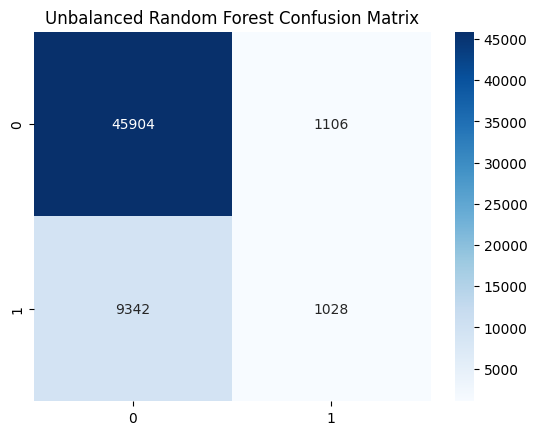

Accuracy: 81.79%
Precision: 48.17%
Recall (TPR): 9.91%
False Positive Rate (FPR): 2.35%
Specificity (TNR): 97.65%
F1 Score: 0.16


In [42]:
sns.heatmap(confusion_matrix(y_val, y_pred_rf), cmap= "Blues", annot=True, fmt='d')
plt.title('Unbalanced Random Forest Confusion Matrix')
plt.show()

cm = confusion_matrix(y_val,y_pred_rf)
tn, fp, fn, tp = cm.ravel()
# Calculate metrics
accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100
precision = (tp / (tp + fp))*100 if (tp + fp) != 0 else 0
recall = (tp / (tp + fn))*100 if (tp + fn) != 0 else 0
fpr = (fp / (fp + tn))*100 if (fp + tn) != 0 else 0
specificity = (tn / (tn + fp))*100 if (tn + fp) != 0 else 0
f1_score = (2 * (precision * recall) / (precision + recall))*.01 if (precision + recall) != 0 else 0

# Display results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall (TPR): {recall:.2f}%")
print(f"False Positive Rate (FPR): {fpr:.2f}%")
print(f"Specificity (TNR): {specificity:.2f}%")
print(f"F1 Score: {f1_score:.2f}")

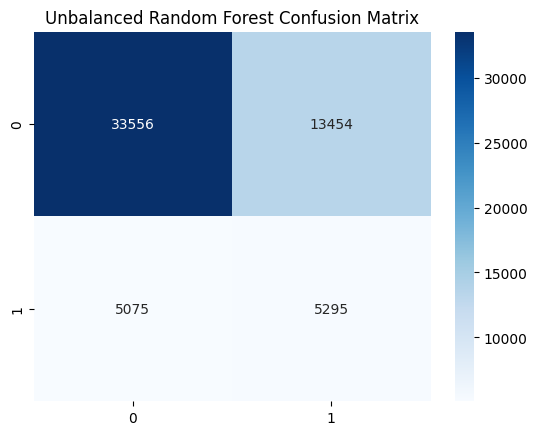

Accuracy: 67.71%
Precision: 28.24%
Recall (TPR): 51.06%
False Positive Rate (FPR): 28.62%
Specificity (TNR): 71.38%
F1 Score: 0.36


In [44]:
sns.heatmap(confusion_matrix(y_val, balanced_y_pred_rf), cmap= "Blues", annot=True, fmt='d')
plt.title('Unbalanced Random Forest Confusion Matrix')
plt.show()

cm = confusion_matrix(y_val,balanced_y_pred_rf)
tn, fp, fn, tp = cm.ravel()
# Calculate metrics
accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100
precision = (tp / (tp + fp))*100 if (tp + fp) != 0 else 0
recall = (tp / (tp + fn))*100 if (tp + fn) != 0 else 0
fpr = (fp / (fp + tn))*100 if (fp + tn) != 0 else 0
specificity = (tn / (tn + fp))*100 if (tn + fp) != 0 else 0
f1_score = (2 * (precision * recall) / (precision + recall))*.01 if (precision + recall) != 0 else 0

# Display results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall (TPR): {recall:.2f}%")
print(f"False Positive Rate (FPR): {fpr:.2f}%")
print(f"Specificity (TNR): {specificity:.2f}%")
print(f"F1 Score: {f1_score:.2f}")